<a href="https://colab.research.google.com/github/kush450629/ME421_GROUP_A1/blob/main/Heat%20Transfer/ME421_E20045_Heat_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INTRODUCTION

### Problem Statement

A factory involved in the manufacturing of dairy products is required to store milk received from collecting centers in a cool room until delivery to the factory the following day. Aluminum containers are received at approximately 1400 hrs. The average temperature of the collected milk ranges from 35°C to 40°C. The system is required to cool the bulk to 15°C within two hours and maintain that temperature until the delivery time at 1400 hrs the next day.

**Design Data:**
* **Number of milk containers collected per day:** 40
* **Weight of an empty container:** 2 kg
* **Weight of milk in a container:** 5 kg
* **Specific heat capacity of the container material:** 921.1 J/kg·K
* **Specific heat capacity of milk:** 4000 J/kg·K

As the engineering team, the objective is to analyze the suitability of the available Air Conditioning unit at the Heat Engine Laboratory for this purpose by performing the following:

1.  Propose a methodology to evaluate the feasibility of the available unit.
2.  Conduct experiments with the laboratory cooling unit to obtain necessary performance data.
3.  Determine the developments or modifications required if the capacity is increased to store 80 milk containers per day.
4.  Compile a comprehensive report on the findings and engineering recommendations.

### Cooling Load Calculation for Milk Storage

### 1. System Parameters
* **Number of containers ($n$):** 40
* **Mass of milk per container ($m_m$):** 5 kg
* **Mass of empty container ($m_c$):** 2 kg
* **Specific heat of milk ($c_m$):** $4000\text{ J/kg}\cdot\text{K}$
* **Specific heat of aluminum ($c_c$):** $921.1\text{ J/kg}\cdot\text{K}$
* **Target temperature ($T_f$):** $15^\circ\text{C}$
* **Cooling time ($t$):** 2 hours ($7200\text{ seconds}$)

---

### 2. Case A: Average Initial Temperature ($T_i = 37.5^\circ\text{C}$)
*Calculated for the $35^\circ\text{C} - 40^\circ\text{C}$ range.*

**Total Heat Removal ($Q$):**
$$Q = n \times [(m_m \cdot c_m + m_c \cdot c_c) \times (T_i - T_f)]$$
$$Q = 40 \times [(5 \cdot 4000 + 2 \cdot 921.1) \times (37.5 - 15)]$$
$$Q = 19,657,980\text{ J} \approx 19.66\text{ MJ}$$

**Required Cooling Load ($\dot{Q}$):**
$$\dot{Q} = \frac{Q}{t} = \frac{19,657,980}{7200}$$
**$$\dot{Q}_{avg} \approx 2.73\text{ kW}$$**

---

### 3. Case B: Maximum Initial Temperature ($T_i = 40^\circ\text{C}$)
*Calculated for the worst-case scenario.*

**Total Heat Removal ($Q$):**
$$Q = 40 \times [(5 \cdot 4000 + 2 \cdot 921.1) \times (40 - 15)]$$
$$Q = 21,842,200\text{ J} \approx 21.84\text{ MJ}$$

**Required Cooling Load ($\dot{Q}$):**
$$\dot{Q} = \frac{Q}{t} = \frac{21,842,200}{7200}$$
**$$\dot{Q}_{max} \approx 3.03\text{ kW}$$**

In [2]:
import pandas as pd

class MilkCoolingSystem:
    def __init__(self):
        # Configuration constants from design data
        self.UNIT_COUNT = 40
        self.MILK_MASS_KG = 5.0
        self.CAN_MASS_KG = 2.0
        self.CP_MILK = 4000.0   # J/kg·K
        self.CP_ALUMINUM = 921.1 # J/kg·K
        self.TARGET_TEMP = 15.0  # °C
        self.WINDOW_SECONDS = 2 * 3600 # 2-hour window

    def compute_thermal_requirement(self, initial_temp):
        """
        Calculates heat energy (Joules) and cooling power (kW).
        Formula: Q = n * [(m_m * c_m + m_c * c_c) * delta_T]
        """
        temp_delta = initial_temp - self.TARGET_TEMP

        # Calculate combined heat capacity of one loaded container
        capacity_per_unit = (self.MILK_MASS_KG * self.CP_MILK) + \
                            (self.CAN_MASS_KG * self.CP_ALUMINUM)

        total_energy_j = self.UNIT_COUNT * capacity_per_unit * temp_delta
        power_kw = (total_energy_j / self.WINDOW_SECONDS) / 1000

        return total_energy_j, power_kw

# Execution Block
factory_sim = MilkCoolingSystem()
scenarios = {
    "Average Loading": 37.5,
    "Worst-Case Loading": 40.0
}

print(f"{'Scenario':<20} | {'Heat Energy (MJ)':<18} | {'Required Load (kW)':<18}")
print("-" * 60)

for label, t_start in scenarios.items():
    energy, load = factory_sim.compute_thermal_requirement(t_start)
    print(f"{label:<20} | {energy/1e6:>18.2f} | {load:>18.3f}")

Scenario             | Heat Energy (MJ)   | Required Load (kW)
------------------------------------------------------------
Average Loading      |              19.66 |              2.730
Worst-Case Loading   |              21.84 |              3.034


# THEORY

### Experimental Methodology for Unit Evaluation

This procedure outlines the experimental approach to determine the actual cooling capacity ($\dot{Q}_{act}$) of the laboratory unit and assess its feasibility for the specified milk cooling task.

---

### 1. Measurement Parameters
To analyze the system, the following physical and thermodynamic properties must be measured:

* **Duct Geometry:** Measure the width ($w$) and height ($h$) of the air intake duct to calculate the cross-sectional area ($A = w \times h$).
* **Air Velocity ($v$):** Use an anemometer to measure the air velocity at the intake. Multiple readings should be averaged to account for non-uniform flow.
* **Psychrometric States:** Measure the **Dry Bulb Temperature ($T_{db}$)** and **Wet Bulb Temperature ($T_{wb}$)** at:
    * **State 1 (Inlet):** Ambient air entering the evaporator.
    * **State 2 (Outlet):** Conditioned air exiting the evaporator.

---

### 2. Psychrometric Theory
The actual cooling capacity depends on the state of the moist air. Since air is a mixture of dry air and water vapor, its total heat content (enthalpy) is the sum of sensible heat (temperature change) and latent heat (phase change of moisture).



**Vapor Pressure and Humidity Ratio:**
To find the specific enthalpy ($h$), we first determine the humidity ratio ($\omega$), which represents the mass of water vapor per unit mass of dry air. This is calculated using the saturation vapor pressure ($P_{swb}$) at the wet bulb temperature via the Magnus-Tetens approximation:
$$P_{swb} = 0.61078 \exp\left(\frac{17.27 \cdot T_{wb}}{T_{wb} + 237.3}\right)$$
The actual vapor pressure ($P_v$) is then derived by accounting for the depression between dry and wet bulb temperatures:
$$P_v = P_{swb} - 0.000662 \cdot P_{atm} \cdot (T_{db} - T_{wb})$$
Finally, the humidity ratio ($\omega$) is determined:
$$\omega = 0.62194 \cdot \frac{P_v}{P_{atm} - P_v}$$

**Specific Enthalpy Calculation:**
The total enthalpy ($h$) in kJ/kg is calculated using the following energy balance:
$$h = c_{pa} T_{db} + \omega (h_{fg} + c_{pv} T_{db})$$
Where:
* $c_{pa} \approx 1.006 \text{ kJ/kg}\cdot\text{K}$ (Specific heat of dry air)
* $h_{fg} \approx 2501 \text{ kJ/kg}$ (Enthalpy of vaporization at $0^\circ\text{C}$)
* $c_{pv} \approx 1.86 \text{ kJ/kg}\cdot\text{K}$ (Specific heat of water vapor)

---

### 3. Thermodynamic Calculations
The performance of the unit is governed by the total enthalpy change of the air stream as it passes through the evaporator.



**Mass Flow Rate of Air ($\dot{m}_a$):**
$$\dot{m}_a = \rho \cdot A \cdot v$$
*Where $\rho \approx 1.2 \text{ kg/m}^3$ (density of air at STP).*

**Actual Cooling Capacity ($\dot{Q}_{act}$):**
The total heat removal rate is the product of the mass flow rate and the enthalpy drop across the evaporator:
$$\dot{Q}_{act} = \dot{m}_a \times (h_{in} - h_{out})$$

---

### 4. Data Collection Table

| Parameter | Symbol | Unit | Value |
| :--- | :--- | :--- | :--- |
| Duct Area | $A$ | $m^2$ | |
| Avg. Air Velocity | $v$ | $m/s$ | |
| Inlet Enthalpy | $h_{in}$ | $kJ/kg$ | |
| Outlet Enthalpy | $h_{out}$ | $kJ/kg$ | |
| **Actual Cooling Capacity** | **$\dot{Q}_{act}$** | **kW** | |

---

### 5. Feasibility Criteria
The unit is deemed suitable if its actual capacity meets the maximum required load calculated for the factory conditions:
* **Target Load (Max):** $3.03 \text{ kW}$
* **Decision Rule:**
    * If $\dot{Q}_{act} \geq 3.03 \text{ kW}$: **Suitable.**
    * If $\dot{Q}_{act} < 3.03 \text{ kW}$: **Insufficient; developments required.**

#OBSERVATIONS

### Experimental Data and Analysis of Fan Speed Performance

This section presents the data obtained at different evaporator fan speeds. The experiment was conducted with the cold room open to maintain a stable inlet condition while varying the air flow rate to determine the setting for maximum heat removal.

### 1. Column Descriptions (Nomenclature)
To interpret the data correctly, the temperature sensors are defined as follows:
* **$D_1$**: internal diameter of return air duct (m)
* **$D_1$**: internal diameter of cool air inlet duct (m)
* **$T_1$**: Return air dry bulb temperature ($^\circ$C)
* **$T_2$**: Return air wet bulb temperature ($^\circ$C)
* **$T_3$**: Evaporator inlet dry bulb temperature ($^\circ$C)
* **$T_4$**: Evaporator inlet wet bulb temperature ($^\circ$C)
* **$T_5$**: Evaporator exit dry bulb temperature ($^\circ$C)
* **$T_6$**: Evaporator exit wet bulb temperature ($^\circ$C)
* **$V_{in}$ / $V_{out}$**: Air velocity at intake and exit (m/s)

---

### 2. Recorded Experimental Data
D_1 = 0.11 m

| Fan Speed | $T_1$ | $T_2$ | $T_3$ | $T_4$ | $T_5$ | $T_6$ | $V_{in}$ | $V_{out}$ |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| **1** | 29.5 | 25.2 | 29.1 | 21.2 | 26.4 | 19.9 | 0.0 | 0.0 |
| **2** | 29.5 | 25.3 | 29.1 | 21.1 | 26.7 | 20.0 | 0.0 | 0.0 |
| **3** | 29.9 | 25.3 | 29.5 | 21.5 | 24.3 | 19.7 | 0.6 | 0.5 |
| **4** | 30.0 | 24.9 | 29.6 | 21.8 | 20.4 | 16.6 | 2.8 | 2.6 |
| **5** | 29.2 | 23.7 | 29.3 | 21.2 | 20.8 | 16.2 | 5.6 | 5.4 |
| **6** | 29.2 | 23.3 | 29.3 | 21.1 | 21.4 | 18.0 | 8.8 | 8.1 |
| **7** | 29.4 | 23.2 | 29.3 | 21.1 | 21.5 | 18.2 | 9.3 | 8.4 |
| **8** | 29.0 | 23.1 | 29.1 | 21.0 | 21.2 | 17.6 | 9.6 | 8.5 |
| **9** | 28.7 | 22.9 | 28.9 | 20.9 | 21.3 | 17.4 | 9.8 | 8.7 |
| **10** | 29.4 | 23.2 | 29.3 | 21.1 | 19.9 | 16.5 | 9.5 | 9.1 |

---



GRAPHS AND CALCULATIONS

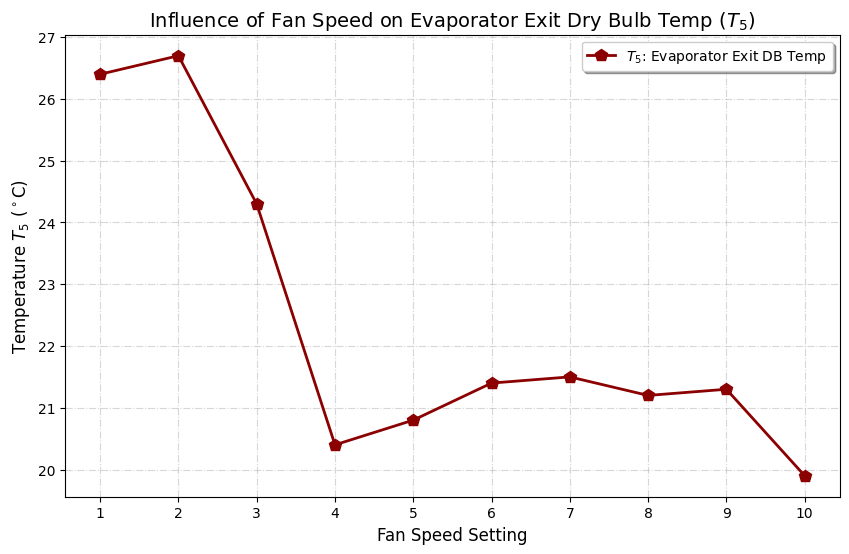

In [3]:
import matplotlib.pyplot as plt

# Dataset from experimental readings
fan_velocity_levels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
evaporator_t5_data = [26.4, 26.7, 24.3, 20.4, 20.8, 21.4, 21.5, 21.2, 21.3, 19.9]

# Initializing plot using subplots (avoids .figure() call)
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting with distinct markers and color
ax.plot(fan_velocity_levels, evaporator_t5_data,
        marker='p',           # Pentagon markers
        linestyle='-',        # Solid line
        color='darkred',      # Professional dark red shade
        linewidth=2,
        markersize=9,
        label=r'$T_{5}$: Evaporator Exit DB Temp')

# Formatting labels and title using LaTeX
ax.set_title(r'Influence of Fan Speed on Evaporator Exit Dry Bulb Temp ($T_{5}$)', fontsize=14)
ax.set_xlabel(r'Fan Speed Setting', fontsize=12)
ax.set_ylabel(r'Temperature $T_{5}$ ($^\circ$C)', fontsize=12)

# Ensure x-axis represents the discrete speed settings exactly
ax.set_xticks(fan_velocity_levels)

# Grid and Legend adjustments
ax.grid(visible=True, linestyle='-.', alpha=0.5)
ax.legend(loc='upper right', shadow=True)

# Save the figure to file
plt.savefig('hvac_temp_performance.png', bbox_inches='tight')

## Experimental Analysis and Thermodynamic Logic

This section details the mathematical framework used to evaluate the cooling capacity of the laboratory unit based on the experimental data obtained.

---

### Mass Flow Rate of Air ($\dot{m}_a$)
The mass flow rate is the foundational parameter for calculating heat transfer. It is derived from the air velocity measured at the intake:

$$\dot{m}_a = \rho \cdot A \cdot V_{in}$$

* **$\rho$**: Density of air ($\approx 1.2 \text{ kg/m}^3$).
* **$A$**: Cross-sectional area of the duct ($m^2$).
* **$V_{in}$**: Measured air intake velocity ($m/s$).

---

### Calculation of Specific Enthalpy ($h$)
To determine the total energy (sensible and latent heat) removed from the air, we use the measured Dry Bulb ($T_{db}$) and Wet Bulb ($T_{wb}$) temperatures.

#### **Step A: Saturation Vapor Pressure ($P_{swb}$)**
Using the Magnus-Tetens approximation at the Wet Bulb temperature:
$$P_{swb} = 0.61078 \cdot \exp\left(\frac{17.27 \cdot T_{wb}}{T_{wb} + 237.3}\right)$$

#### **Step B: Actual Vapor Pressure ($P_v$)**
Applying the psychrometric formula to account for the evaporative cooling effect:
$$P_v = P_{swb} - 0.000662 \cdot P_{atm} \cdot (T_{db} - T_{wb})$$
* **$P_{atm}$**: Atmospheric pressure ($101.325 \text{ kPa}$).

#### **Step C: Humidity Ratio ($\omega$)**
$$\omega = 0.62194 \cdot \frac{P_v}{P_{atm}-P_v}$$

#### **Step D: Specific Enthalpy ($h$)**
The total enthalpy in $\text{kJ/kg}$ of dry air is calculated as:
$$h = (c_{p,a} \cdot T_{db}) + \omega \cdot (h_{fg} + c_{p,v} \cdot T_{db})$$

* **$c_{p,a}$**: $1.006 \text{ kJ/kg}\cdot\text{K}$ (Specific heat of dry air).
* **$h_{fg}$**: $2501 \text{ kJ/kg}$ (Latent heat of vaporization).
* **$c_{p,v}$**: $1.86 \text{ kJ/kg}\cdot\text{K}$ (Specific heat of water vapor).



---

### Determination of Heat Removal Rate ($\dot{Q}$)
The experimental cooling capacity is defined by the enthalpy difference between the **Return Air** (Inlet) and the **Evaporator Exit** (Outlet):

$$\dot{Q} = \dot{m}_a \cdot (h_{in} - h_{out})$$

* **$h_{in}$**: Calculated using $T_1$ (Return DB) and $T_2$ (Return WB).
* **$h_{out}$**: Calculated using $T_5$ (Exit DB) and $T_6$ (Exit WB).

---




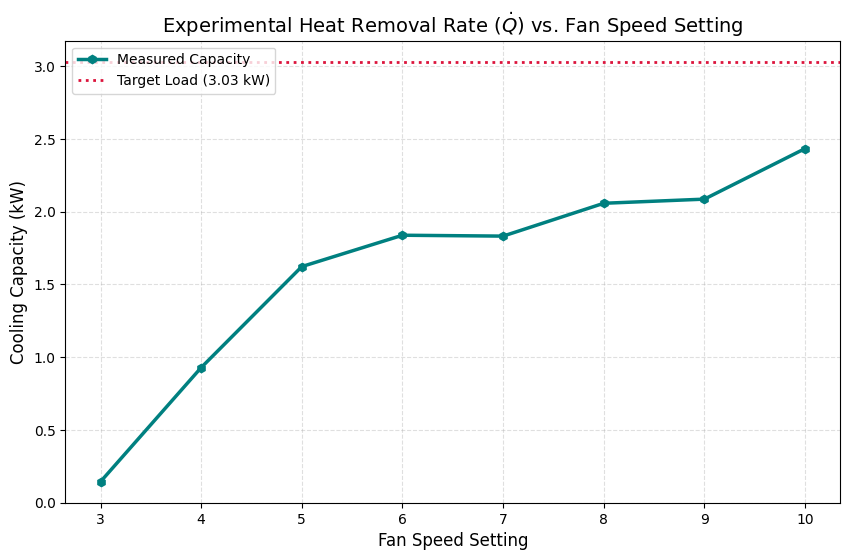

 velocity_index  air_speed_ms  cooling_power_kw
              3           0.6          0.144262
              4           2.8          0.928436
              5           5.6          1.622419
              6           8.8          1.837842
              7           9.3          1.831778
              8           9.6          2.057423
              9           9.8          2.085847
             10           9.5          2.433180


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Experimental Observation Dataset
hvac_records = {
    "velocity_index": [3, 4, 5, 6, 7, 8, 9, 10],
    "temp_db_in": [29.9, 30.0, 29.2, 29.2, 29.4, 29.0, 28.7, 29.4],
    "temp_wb_in": [25.3, 24.9, 23.7, 23.3, 23.2, 23.1, 22.9, 23.2],
    "temp_db_out": [24.3, 20.4, 20.8, 21.4, 21.5, 21.2, 21.3, 19.9],
    "temp_wb_out": [19.7, 16.6, 16.2, 18.0, 18.2, 17.6, 17.4, 16.5],
    "air_speed_ms": [0.6, 2.8, 5.6, 8.8, 9.3, 9.6, 9.8, 9.5]
}

hvac_results = pd.DataFrame(hvac_records)

# 2. Design Constants & Geometry
ATM_PRESSURE = 101.325  # kPa
AIR_DENSITY = 1.2       # kg/m3
DUCT_DIAMETER = 0.11    # m
CROSS_SECTION_AREA = np.pi * (DUCT_DIAMETER**2) / 4

def calc_air_enthalpy(db_temp, wb_temp):
    """
    Computes enthalpy (h) via saturation vapor pressure and humidity ratio.
    """
    # Vapor pressure at saturation for Wet Bulb
    sat_p_wb = 0.61078 * np.exp((17.27 * wb_temp) / (wb_temp + 237.3))

    # Actual vapor pressure using psychrometric formula
    act_p_v = sat_p_wb - 0.000662 * ATM_PRESSURE * (db_temp - wb_temp)

    # Humidity Ratio (omega)
    hum_ratio = 0.62194 * act_p_v / (ATM_PRESSURE - act_p_v)

    # Specific Enthalpy (kJ/kg) calculation
    return 1.006 * db_temp + hum_ratio * (2501 + 1.86 * db_temp)

# 3. Thermodynamic Processing
hvac_results['h_inlet'] = calc_air_enthalpy(hvac_results['temp_db_in'], hvac_results['temp_wb_in'])
hvac_results['h_outlet'] = calc_air_enthalpy(hvac_results['temp_db_out'], hvac_results['temp_wb_out'])

# Mass Flow and Power Calculations
hvac_results['mass_flow'] = AIR_DENSITY * CROSS_SECTION_AREA * hvac_results['air_speed_ms']
hvac_results['cooling_power_kw'] = hvac_results['mass_flow'] * (hvac_results['h_inlet'] - hvac_results['h_outlet'])

# 4. Data Visualization
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(hvac_results['velocity_index'], hvac_results['cooling_power_kw'],
        marker='h', color='teal', lw=2.5, label='Measured Capacity')

# Benchmark Reference for 40 containers
ax.axhline(y=3.03, color='crimson', linestyle=':', linewidth=2, label='Target Load (3.03 kW)')

# Plot Formatting
ax.set_title(r'Experimental Heat Removal Rate ($\dot{Q}$) vs. Fan Speed Setting', fontsize=14)
ax.set_xlabel(r'Fan Speed Setting', fontsize=12)
ax.set_ylabel(r'Cooling Capacity (kW)', fontsize=12)
ax.set_xticks(hvac_results['velocity_index'])
ax.grid(True, linestyle='--', alpha=0.4)
ax.legend(frameon=True, loc='upper left')

plt.show()

# Displaying calculated results
print(hvac_results[['velocity_index', 'air_speed_ms', 'cooling_power_kw']].to_string(index=False))